<a href="https://colab.research.google.com/github/Arunimad/CCIR_MLENG/blob/main/TA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLTK**, or Natural Language Toolkit, is a Python package that we are going to use for NLP.
It contains a variety of libraries for various purposes like text classification, parsing, stemming, tokenizing, etc.

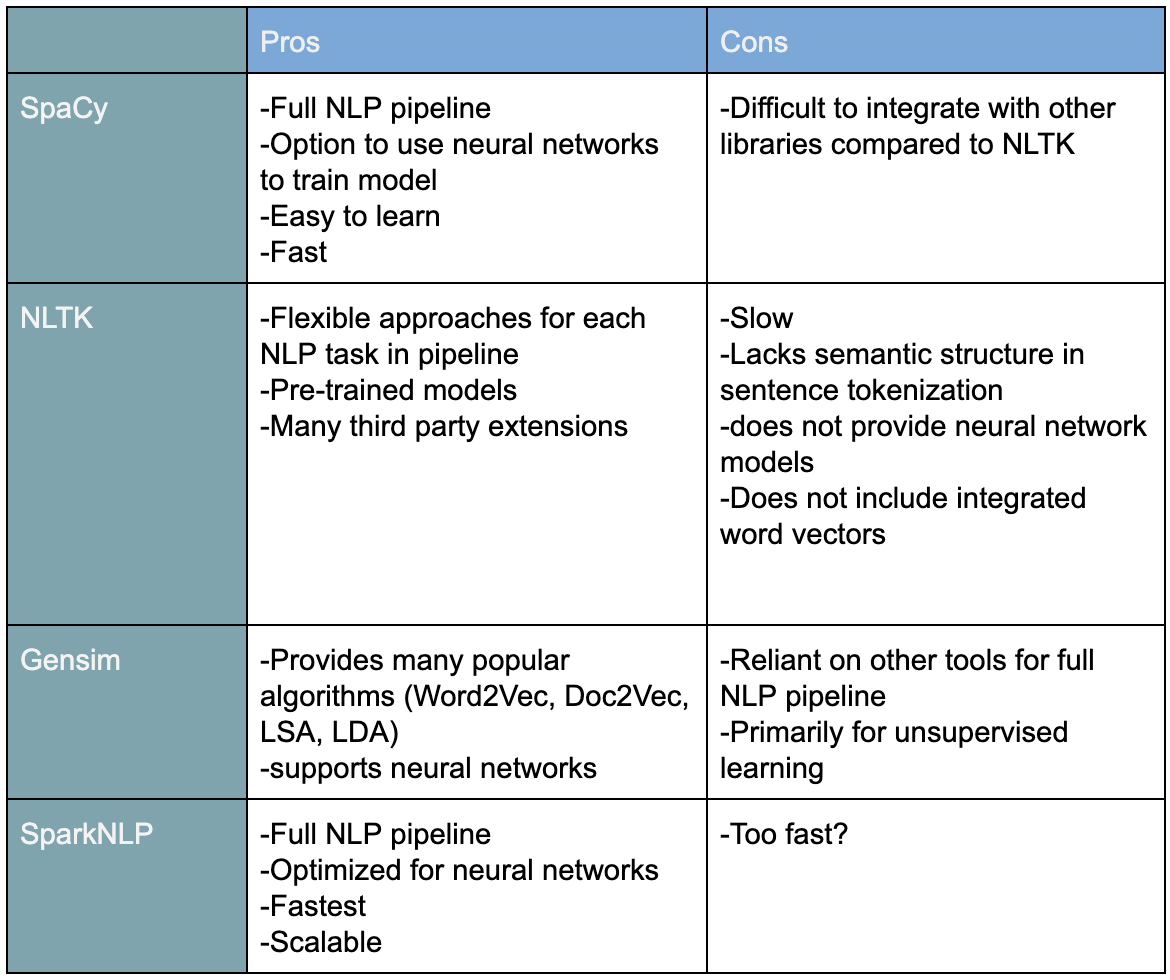

In [ ]:
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""
# Splits at space
text.split()

In [ ]:
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""
# Splits at '.'
text.split('. ')

In [ ]:
pip install nltk


In [ ]:
pip install numpy

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
example_string = " ChatGPT is a natural language processing tool driven by AI technology that allows you to have human-like conversations and much more with the chatbot. The language model can answer questions and assist you with tasks, such as composing emails, essays, and code."

In [ ]:
sent_tokenize(example_string)

In [ ]:
word_tokenize(example_string)

We used somthing called 'punkt'

What is PunktSentenceTokenizer?

In NLTK, PUNKT is an unsupervised trainable model, which means it can be trained on unlabeled data (Data that has not been tagged with information identifying its characteristics, properties, or categories is referred to as unlabeled data.)

It generates a list of sentences from a text by developing a model for words that start sentences, prepositional phrases, and abbreviations using an unsupervised technique. Without first being put to use, it has to be trained on a sizable amount of plaintext in the intended language.

Reference

The NLTK framework includes an implementation of a sentence tokeniser – that is, a program which performs sentence segmentation – which can handle texts in several languages. This tokeniser is called PunktSentenceTokenizer and is based on the publication by Kiss, T. & Strunk, J., 2006. Unsupervised Multilingual Sentence Boundary Detection. Computational Linguistics, 32(4), pp. 485-525.

In [ ]:
text = "We met Miss. Tanaya Das and Mr.Rohan Singh today. They are pursuing a B.tech degree in Data Science."


In [ ]:
sent_tokenize(text)

we get a problem!

The output of the code is relevant but not completely correct. Here the punkt package has succeeded in identifying the abbreviation “Mr.” but fails to recognize that the period after the abbreviation “Miss” is not the end of the sentence.

The main advantage of this package as discussed before is that it used an unsupervised algorithm, which means that one can train the model and hence make the overall code more accurate.

Training custom tokenizer

Let’s try to train the punkt sentence tokenizer. For training first, we need to define a corpus. (A corpus comprising text and speech data used for natural language processing can be utilized to train AI and machine learning systems.)

In [ ]:
corpus = """
The word miss has multiple meanings thats the reason why its tricky for nlp to recognize it as a abbrevation.Miss. means to fail to hit something, to fail to meet something, or to feel sadness over the absence or loss of something. The word miss. has several other senses as a verb and a noun.
To miss. something is to fail to hit or strike something, as with an arrow miss. a target. If a runaway vehicle miss. a stop sign, then it doesn’t smash into it.
Real-life examples: If you throw a basketball to your friend and they don’t catch it, the ball miss. When a baseball player miss. a baseball with their bat, they try to hit the ball with the bat but fail to. A bowling ball that doesn’t knock down any pins has miss. them.
"""

Once we define a relevant corpus, we further use punktTrainer() – learns parameters used in Punkt sentence boundary detection, after that, we use the “train” function to gather learning information from a given text. It will select all of the parameters for sentence boundary detection if finalize is set to True. In the event that neither get params() nor finalize training() is executed, this will be postponed. Abbreviations detected will be listed if verbose is True.

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer
trainer = PunktTrainer()


In [ ]:
trainer.train(corpus, finalize=False,verbose=True)
abbreviations = "Miss.,Dr.,MSc."
trainer.train(abbreviations, finalize=False, verbose =True)

tokenizer = PunktSentenceTokenizer(trainer.get_params())


In [ ]:
tokenizer.tokenize(text)

**Tokenization In Continuous Modalities Vision or Speech**

Tokenizers are not quite present in modalities like image or speech.

Instead, the images or audio is split into a matrix of patches without dictionary equivalent as in case of the text.

Image architectures Vision Transformer (ViT), Resnets split image into overlapping patches and then encode these.

Outputs embeddings of these can then be passed to ,e.g., transformer (CMA-CLIP or MMBT)

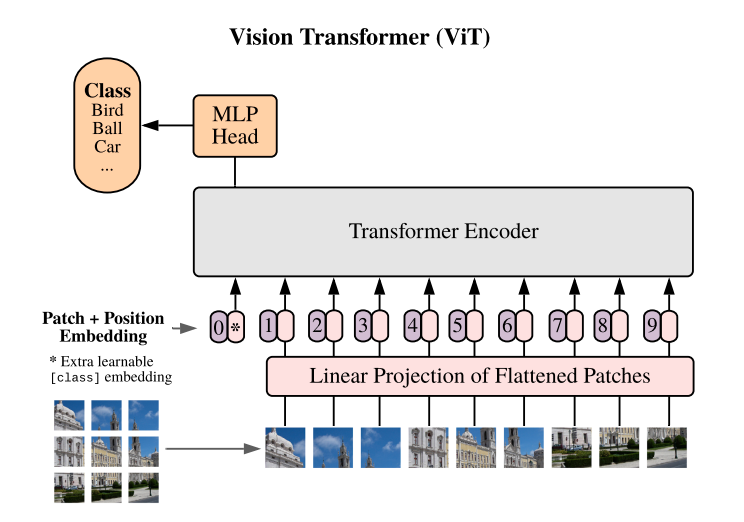

Other popular modules in NLTK

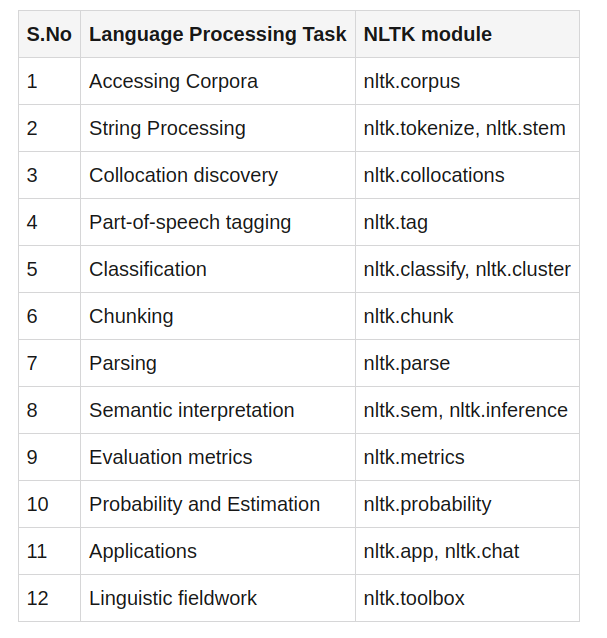

# **STEMMING**

The stem of the verb wait is wait: it is the part that is common to all its inflected variants.

wait (infinitive)

wait (imperative)

waits (present, 3rd person, singular)

wait (present, other persons and/or plural)

waited (simple past)

waited (past participle)

waiting (progressive)


**Inflection** is a process of word formation, in which a word is modified to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, mood, animacy, and definiteness

Sometime spelling may also change in order to make a new word.

beauty, duty + -ful → beautiful, dutiful (-y changes to i)

heavy, ready + -ness → heaviness, readiness (-y changes to i)

able, possible + -ity → ability, possibility (-le changes to il)

permit, omit + -ion → permission, omission (-t changes to ss)

**OverStemming**

Over-stemming is when two words with different stems are stemmed to the same root. This is also known as a false positive.

universal

university

universe

All the above 3 words are stemmed to univers which is wrong behavior.

**UnderStemming**

Under-stemming is when two words that should be stemmed to the same root are not. This is also known as a false negative. Below is the example for the same.

alumnus

alumni

alumnae


Truncating Stemming Algorithm

1. Porter Stemmer

This is one of the most common and gentle stemmer, Its fast but not very precise.

In [ ]:
import nltk
from nltk.stem.porter import *

In [ ]:
nltk.download('punkt')

In [ ]:
porterStemmer = PorterStemmer()

In [ ]:
sentence = "Provision Maximum multiply owed caring on go gone going was this"

In [ ]:
wordList = nltk.word_tokenize(sentence)

stemWords = [porterStemmer.stem(word) for word in wordList]

print(' '.join(stemWords))

Problem?

Look at the input and you can see we are passing “was” and getting “wa” as output. This is something which should be considered under less precise algorithm. To increase the precision another algorithm came which was SnowBall Stemmer.

2. Snowball Stemmer

The actual name of this stemmer is English Stemmer or Porter2 Stemmer There were some improvements done on Porter Stemmer which made it more precise over large data-sets

In [ ]:
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

sentence = "Provision Maximum multiply owed caring on go gone going was this"
wordList = nltk.word_tokenize(sentence)

stemWords = [snowBallStemmer.stem(word) for word in wordList]

print(' '.join(stemWords))

Small comparison

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, RegexpStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')
regexp   = RegexpStemmer('ing$|s$|e$|able$', min=4)
word_list = ["friend", "friendship", "friends", "friendships"]
print("{0:20}{1:20}{2:20}{3:30}{4:40}".format("Word","Porter Stemmer","Snowball Stemmer","Lancaster Stemmer",'Regexp Stemmer'))
for word in word_list:
    print("{0:20}{1:20}{2:20}{3:30}{4:40}".format(word,porter.stem(word),snowball.stem(word),lancaster.stem(word),regexp.stem(word)))

# **LEMMATIZATION**

**Lemmatization**

In contrast to stemming, lemmatization is a lot more powerful. It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words, aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

   meeting    --->   meet                (core-word extraction)

   was        --->    be                 (tense conversion to present tense)

   mice       --->   mouse               (plural to singular)


1. Wordnet Lemmatizer  

Wordnet is a publicly available lexical database of over 200 languages that provides semantic relationships between its words. It is one of the earliest and most commonly used lemmatizer technique.  

* It is present in the nltk library in python.
* Wordnet links words into semantic relations. ( eg. synonyms )
*It groups synonyms in the form of synsets.

synsets : a group of data elements that are semantically equivalent.

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()


# single word lemmatization examples
list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling',
         'driving', 'died', 'tried', 'feet']
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words))

In [ ]:
nltk.download('punkt')
# sentence lemmatization examples
string = 'the cat is sitting with the bats on the striped mat under many flying geese'

# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)


lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])

print(lemmatized_string)

*Wordnet Lemmatizer (with POS tag)*

In the above approach, we observed that Wordnet results were not up to the mark. Words like ‘sitting’, ‘flying’ etc remained the same after lemmatization. This is because these words are treated as a noun in the given sentence rather than a verb. To overcome come this, we use POS (Part of Speech) tags. We add a tag with a particular word defining its type (verb, noun, adjective etc).

For Example,

Word + Type (POS tag) —> Lemmatized Word
driving + verb ‘v’ —> drive
dogs + noun ‘n’ —> dog

In [ ]:
# WORDNET LEMMATIZER (with appropriate pos tags)

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# Define function to lemmatize each word with its POS tag

# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

sentence = 'the cat is sitting with the bats on the striped mat under many badly flying geese'

# tokenize the sentence and find the POS tag for each token
pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

print(pos_tagged)


# As you may have noticed, the above pos tags are a little confusing.

# we use our own pos_tagger function to make things simpler to understand.
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
print(wordnet_tagged)


lemmatized_sentence = []
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_sentence.append(word)
    else:
        # else use the tag to lemmatize the token
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
lemmatized_sentence = " ".join(lemmatized_sentence)

print(lemmatized_sentence)

# **Dependency Parsing**

A well-known example of ambiguity is shown in (2), from the Groucho Marx movie, Animal Crackers (1930):

	While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know.

  Let's take a closer look at the ambiguity in the phrase: I shot an elephant in my pajamas. First we need to define a simple grammar:


Syntactic Categories

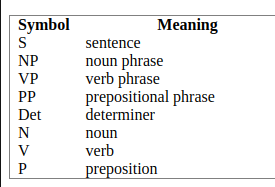

In [ ]:
groucho_grammar = nltk.CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | Det N PP | 'I'
... VP -> V NP | VP PP
... Det -> 'an' | 'my'
... N -> 'elephant' | 'pajamas'
... V -> 'shot'
... P -> 'in'
... """)

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']

In [ ]:
parser = nltk.ChartParser(groucho_grammar)

In [ ]:
trees = list(parser.parse(sent))

In [ ]:
for tree in parser.parse(sent):
  print(tree)

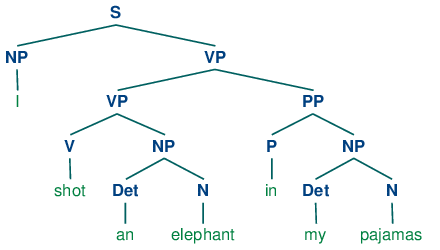


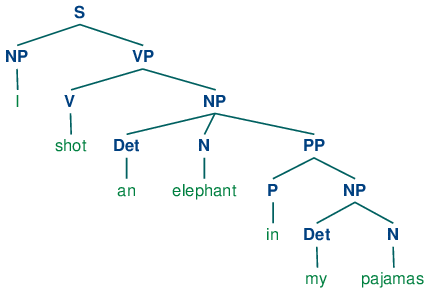



In [ ]:
from nltk.grammar import *

In [ ]:
type(tree[0])

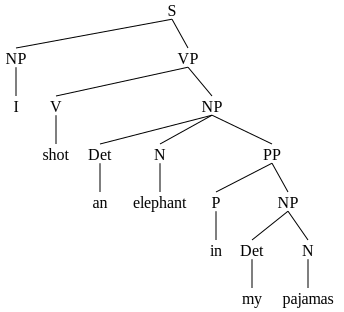

In [ ]:
trees[1]

Recursive Descent Parsing

The simplest kind of parser interprets a grammar as a specification of how to break a high-level goal into several lower-level subgoals. The top-level goal is to find an S. The S → NP VP production permits the parser to replace this goal with two subgoals: find an NP, then find a VP. Each of these subgoals can be replaced in turn by sub-sub-goals, using productions that have NP and VP on their left-hand side. Eventually, this expansion process leads to subgoals such as: find the word telescope. Such subgoals can be directly compared against the input sequence, and succeed if the next word is matched. If there is no match the parser must back up and try a different alternative.

Stages

The recursive descent parser builds a parse tree during the above process. With the initial goal (find an S), the S root node is created. As the above process recursively expands its goals using the productions of the grammar, the parse tree is extended downwards (hence the name recursive descent). We can see this in action using the graphical demonstration nltk.app.rdparser()

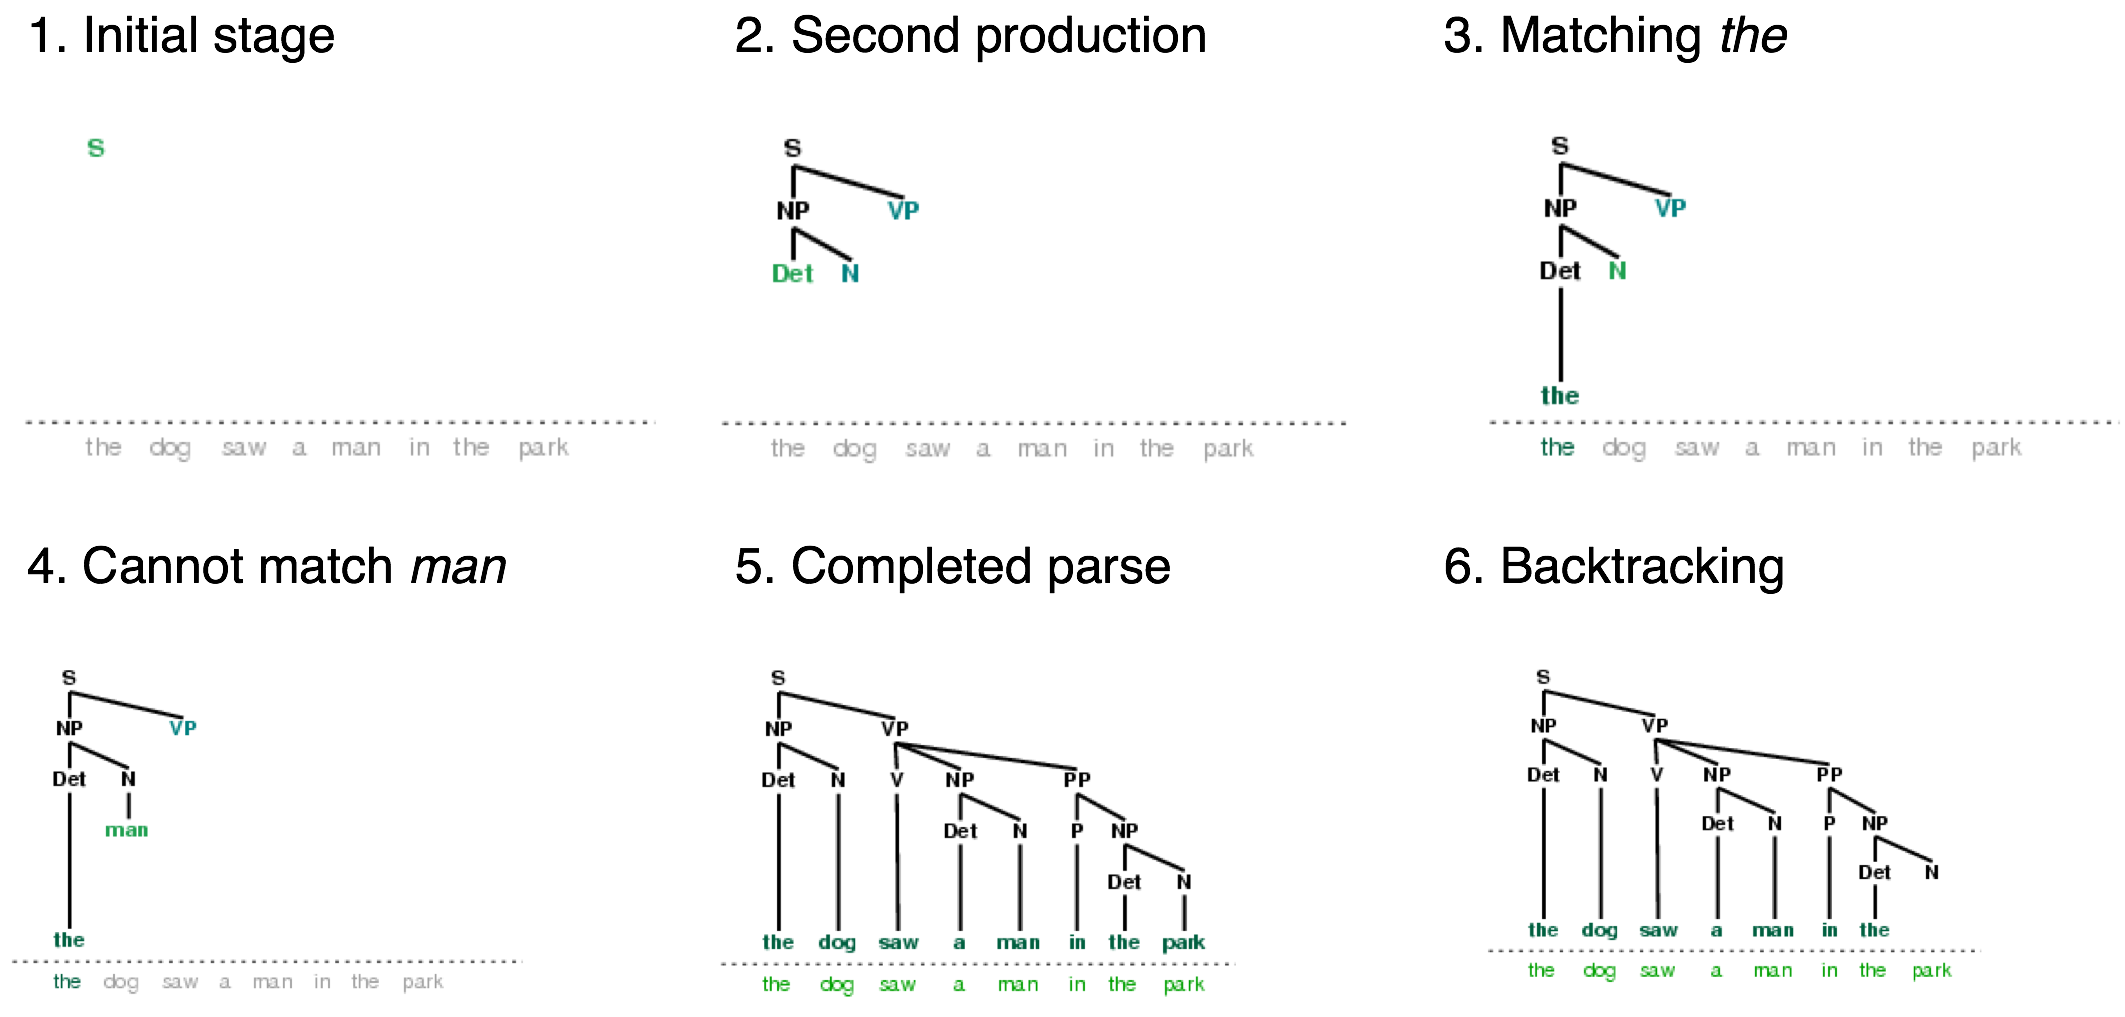

In [ ]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [ ]:
rd_parser = nltk.RecursiveDescentParser(grammar1)
sent = 'Mary saw a dog'.split()
for tree in rd_parser.parse(sent):
  print(tree)